***Homework 3***
---
---

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/bank/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


***Question 1***
- What is the most frequent observation (mode) for the column education?

In [3]:
df['education'].mode()

0    secondary
Name: education, dtype: object

***Question 2***
- What are the two features that have the biggest correlation?

In [4]:
corr_data = df[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']]

corr_data.corr()

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


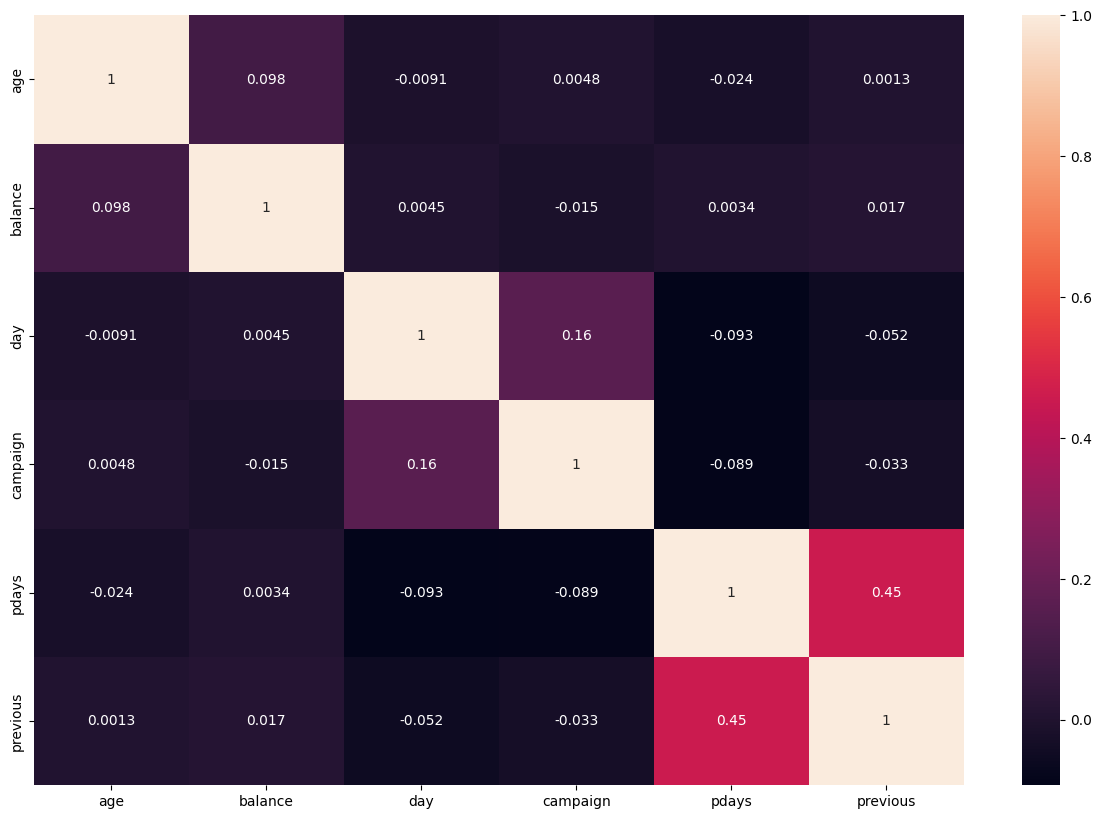

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(corr_data.corr(), annot = True)
plt.show()

***Target Encoding***


In [6]:
df['y'] = (df.y == 'yes').astype(int)
df['y'].unique()

array([0, 1])

***Splitting the Data***


In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

df_train.shape, df_val.shape, df_test.shape

((27126, 17), (9042, 17), (9043, 17))

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [13]:
del df_train['y']
del df_val['y'] 
del df_test['y']  

***Question 3***

- Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2)

In [17]:
from sklearn.metrics import mutual_info_score

round(mutual_info_score(df_full_train.contact, df_full_train.y), 2)

0.01

In [18]:
round(mutual_info_score(df_full_train.education, df_full_train.y), 2)

0.0

In [19]:
round(mutual_info_score(df_full_train.housing, df_full_train.y), 2)

0.01

In [20]:
round(mutual_info_score(df_full_train.poutcome, df_full_train.y), 2)

0.03

***Question 4***

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
      model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    - Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
dv.fit(train_dicts)

In [24]:
X_train = dv.transform(train_dicts)
X_train

array([[3.200e+01, 1.100e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.900e+01, 3.309e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [5.400e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.500e+01, 2.311e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+01, 1.500e+01, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]], shape=(27126, 51))

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [26]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

In [34]:
y_pred = model.predict_proba(X_val)[:, 1]

In [35]:
subscription_decision = (y_pred >= 0.5).astype(int)
subscription_decision

array([0, 0, 0, ..., 0, 0, 0], shape=(9042,))

In [50]:
Original_model = (y_val == subscription_decision).mean()

***Question 5***

- Let's find the least useful feature using the feature elimination technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [38]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [39]:
# Features to be removed and tested for each model age, balance, martial, previous

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

In [41]:
features = ['job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

dv = DictVectorizer(sparse=False)
train_dicts = df_train[features].to_dict(orient='records')
dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

subscription_decision = (y_pred >= 0.5).astype(int)

without_age = (y_val == subscription_decision).mean()
print(f'Without age: {without_age}')

Without age: 0.9002433090024331


In [44]:
features = ['age', 'job', 'marital', 'education', 'default','housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

dv = DictVectorizer(sparse=False)
train_dicts = df_train[features].to_dict(orient='records')
dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

subscription_decision = (y_pred >= 0.5).astype(int)

without_balance = (y_val == subscription_decision).mean()
print(f'Without Balance: {without_balance}')

Without Balance: 0.9002433090024331


In [45]:
features = ['age', 'job', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

dv = DictVectorizer(sparse=False)
train_dicts = df_train[features].to_dict(orient='records')
dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

subscription_decision = (y_pred >= 0.5).astype(int)

without_martial = (y_val == subscription_decision).mean()
print(f'Without martial: {without_martial}')

Without martial: 0.9002433090024331


In [47]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']

dv = DictVectorizer(sparse=False)
train_dicts = df_train[features].to_dict(orient='records')
dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

subscription_decision = (y_pred >= 0.5).astype(int)

without_previous = (y_val == subscription_decision).mean()
print(f'Without Previous: {without_previous}')    

Without Previous: 0.9002433090024331


In [52]:
# Difference of all the models with the original one

First = Original_model - without_age
Second = Original_model - without_balance
Third = Original_model - without_martial
Fourth = Original_model - without_previous

print(f'Difference without age: {First} \nDifference without balance: {Second} \nDifference without martial: {Third} \nDifference without previous: {Fourth}')

Difference without age: 0.0 
Difference without balance: 0.0 
Difference without martial: 0.0 
Difference without previous: 0.0


***Question 6***

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

In [55]:
regularization_strength = [0.01, 0.1, 1, 10, 100]

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

result = []

for c in regularization_strength:
       dv = DictVectorizer(sparse=False)
       train_dicts = df_train[features].to_dict(orient='records')
       dv.fit_transform(train_dicts)

       model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
       model.fit(X_train, y_train)

       y_pred = model.predict_proba(X_val)[:, 1]

       subscription_decision = (y_pred >= 0.5).astype(int)

       model_score = round((y_val == subscription_decision).mean(),3)
       result.append(model_score)
       
result

[np.float64(0.898),
 np.float64(0.9),
 np.float64(0.9),
 np.float64(0.9),
 np.float64(0.9)]